# Time-Varying Sharpe Ratio Based on Conditional Volatility from GARCH Model

To establish a clear foundation for our analysis, we will adopt the following assumptions:

1. **Standard Deviation as a Measure of Risk**: The standard deviation of returns will be used as the primary metric to quantify risk.

2. **Non-IID Stock Data**: Stock market data will be treated as non-independent and non-identically distributed (non-IID), acknowledging the inherent dependencies and varying distributions over time.

These assumptions align with real-world financial market dynamics and provide a robust framework for subsequent modeling and analysis.

## Sharpe Ratio
The Sharpe Ratio is widely used to assess the risk-adjusted return of investments, including options, by calculating **return over risk**. However, this method overlooks the **non-IID** nature of stock data, which is crucial in real-world financial markets. Stock prices exhibit **autocorrelation**, where past returns influence future returns, leading to phenomena like **momentum** or **mean reversion**. Ignoring this correlation can distort risk and return calculations, ultimately providing a misleading assessment of an asset’s true performance. While the Sharpe Ratio is useful for general purposes, it is important to incorporate models that account for **time-varying volatility** and the non-IID behavior of stock data to more accurately evaluate risk-adjusted returns.

## Conditional Volatility
Conditional volatility refers to the time-varying risk of asset returns, adjusting for changing market conditions over time. Unlike standard deviation, which assumes **constant volatility**, conditional volatility reflects the influence of past returns and market shocks on future risk. In the context of the Sharpe ratio, conditional volatility is used to replace constant volatility in the denominator, offering a more accurate measure of risk that adapts to **fluctuating market environments**. The formula for conditional volatility in a GARCH model incorporates past return shocks and prior volatility to estimate future risk. Using conditional volatility in the Sharpe ratio calculation results in a more **dynamic and precise** evaluation of an asset’s risk-adjusted return.

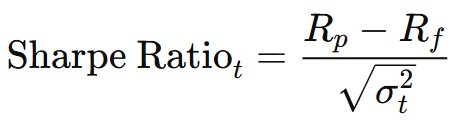

The only modification to the original formula lies in the denominator, where the standard deviation ($\sigma$) is replaced by conditional volatility $\sqrt{\sigma_t^2}$.

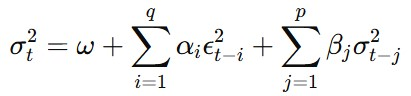

In a GARCH(p, q) model (Generalized Autoregressive Conditional Heteroskedasticity), the conditional volatility, often denoted as
$\sigma_t^2$, is modeled as a function of past squared residuals (ARCH terms) and past conditional variances (GARCH terms).

## Downside
Keep in mind that the GARCH model can suffer from overfitting when high values of **p** and **q** are selected. To mitigate this risk, it's crucial to perform **hyperparameter tuning** and use techniques such as **cross-validation** to identify the optimal model parameters. This will ensure better generalization and prevent the model from fitting noise in the data.

## Conclusion
The time-varying volatility can be modeled using a GARCH(p, q) framework to capture the non-IID nature of asset returns, with conditional volatility ($\sigma_t$) serving as a dynamic risk measure. This allows for a more accurate calculation of the Sharpe ratio, incorporating time-varying risk in the denominator. To mitigate overfitting, it is essential to employ cross-validation and a rolling window approach for optimal hyperparameter selection.

## Here is a simple python tutorial I have provided to showcase the use of GARCH model for time-varying sharpe ratio calculation

In [4]:
import numpy as np
from arch import arch_model
import yfinance as yf

In [5]:
# Constants
START_DATE = '2010-01-01'
END_DATE = '2025-01-01'
INTERVAL = '3mo'
TICKER = 'MA'
ANNUAL_US_TREASURY_BILL_RATE = 0.05
P = 10
Q = 10

In [21]:
data = yf.download(TICKER, start=START_DATE, end=END_DATE, interval=INTERVAL)
data = data['Close'].pct_change()
data = data.dropna()
data = list(data[TICKER])

[*********************100%***********************]  1 of 1 completed


In [35]:
data[:5]

[-0.21398817297087025,
 0.12328921450976171,
 0.0012439592181781034,
 0.12395309605411531,
 0.19790441983425033]

In [22]:
model = arch_model(data, vol='Garch', p=P, q=Q)
results = model.fit()

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01056. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:     24,   Neg. LLF: 49.02888904408984
Iteration:      2,   Func. Count:     49,   Neg. LLF: 2814.612548838516
Iteration:      3,   Func. Count:     73,   Neg. LLF: -35.72278416379367
Iteration:      4,   Func. Count:     97,   Neg. LLF: -38.9431122782588
Iteration:      5,   Func. Count:    121,   Neg. LLF: -35.087368019865316
Iteration:      6,   Func. Count:    145,   Neg. LLF: -47.76577507341236
Iteration:      7,   Func. Count:    169,   Neg. LLF: -51.985963672387086
Iteration:      8,   Func. Count:    193,   Neg. LLF: -53.070721242037955
Iteration:      9,   Func. Count:    216,   Neg. LLF: -52.61935854098327
Iteration:     10,   Func. Count:    240,   Neg. LLF: -36.233774014778206
Iteration:     11,   Func. Count:    264,   Neg. LLF: -51.90627049155283
Iteration:     12,   Func. Count:    288,   Neg. LLF: -53.80755235133931
Iteration:     13,   Func. Count:    311,   Neg. LLF: -53.847258121656964
Iteration:     14,   Func. Count:    334,   Neg. 

In [26]:
# Declare Variables
rf = ((1 + ANNUAL_US_TREASURY_BILL_RATE) - 1) / 12
sigma_t = results.conditional_volatility.mean()
std = np.std(data)
return_avg = np.mean(data)

In [31]:
sigma_t, std

(0.10018760199545983, 0.10276952012697559)

In [30]:
time_varying_sharpe_ratio = (return_avg - rf) / sigma_t
sharpe_ratio = (return_avg - rf) / std
time_varying_sharpe_ratio, sharpe_ratio

(0.5504491015024359, 0.5366199572786452)